Import relevant modules

In [1]:
#import relevant modules
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import functions
import subprocess
import os
import time
import math
import datetime

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 14, 'lines.markersize': 3})

Object and observatory details

In [2]:
object = '1998 XB'
obs_code = 995

Jackknifing process - removing observations one-by-one 

In [3]:
elements = []
rows = []
os.chdir('C:\\Users\\bradl\\.vscode\\advanced_lab')
with open(f'Data/{object}_data.txt') as file:
    for line in file:
        rows.append(line)
    functions.run_find_orb(f'Data/{object}_data.txt')
    print(functions.read_fo_elements('elements.txt'))
    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_epoch, fo_mean_anomaly = functions.read_fo_elements('elements.txt')
    functions.write_orbital_parameters(object, fo_epoch, fo_mean_anomaly, fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc)
    best_fit_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_mean_anomaly], dtype=np.float64)
no_of_observations = len(rows)
print(rows)

for i in range(2, no_of_observations):
    os.chdir('C:\\Users\\bradl\\.vscode\\advanced_lab')
    temp = rows[0:i] + rows[i+1:len(rows)]
    print(temp)
    with open('temp_data.txt', 'w') as file:
        file.writelines(temp)
    functions.run_find_orb(f'temp_data.txt')
    fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_epoch, fo_mean_anomaly = functions.read_fo_elements('elements.txt')
    fo_elements = np.array([fo_peri_arg, fo_sma, fo_asc_node, fo_eccentricity, fo_inc, fo_period, fo_peri_dist, fo_apogee_dist, fo_mean_anomaly], dtype=np.float64)
    elements.append(fo_elements)
#print(elements)
print(best_fit_elements)
errors = np.std(elements, axis=0)
print(errors)

fo_peri_arg_err, fo_sma_err, fo_asc_node_err, fo_eccentricity_err, fo_inc_err, fo_period_err, fo_peri_dist_err, fo_apogee_dist_err, fo_mean_anomaly_err = [errors[i] for i in range (0,len(errors))]

('202.71508', '0.90789287', '75.66575', '0.3508248', '13.58636', '0.865', '0.58938148', '1.22640425', '2024 02 23', '247.87283519')
['123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|\n', '<-ObjDesig->*nnYYYY MM DD.DDDDD HH MM SS.SSSsdd mm ss.ss<blanks >MM.MMBz<ref>COD\n', '1998 XB        2024 01 17.76573 05 48 34.83 +59 03 11.11                     995 0.180 0.125\n', '1998 XB        2024 01 18.75176 05 41 33.16 +59 10 16.28                     995 0.129 0.149\n', '1998 XB        2024 01 24.82887 05 03 16.01 +59 10 39.39                     995 0.270 0.204\n', '1998 XB        2024 01 26.77069 04 53 09.62 +58 58 57.47                     995 0.450 0.360\n', '1998 XB        2024 01 30.84638 04 35 19.48 +58 23 39.47                     995 0.135 0.121\n', '1998 XB        2024 02 03.92998 04 21 47.42 +57 39 57.51                     995 0.163 0.153\n', '1998 XB        2024 02 07.79556 04 12 29.62 +56 56 19.90                     995 0.162 0.182\n', '1998 XB 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([234.20338041, 234.47684483, 234.75030925, 235.02377366,
        235.29723808, 235.5707025 , 235.84416692, 236.11763134,
        236.39109576, 236.66456017, 236.93802459, 237.21148901,
        237.48495343, 237.75841785, 238.03188226, 238.30534668,
        238.5788111 , 238.85227552, 239.12573994, 239.39920436,
        239.67266877, 239.94613319, 240.21959761, 240.49306203,
        240.76652645, 241.03999086, 241.31345528, 241.5869197 ,
        241.86038412, 242.13384854, 242.40731296, 242.68077737,
        242.95424179, 243.22770621, 243.50117063, 243.77463505,
        244.04809947, 244.32156388, 244.5950283 , 244.86849272,
        245.14195714, 245.41542156, 245.68888597, 245.96235039,
        246.

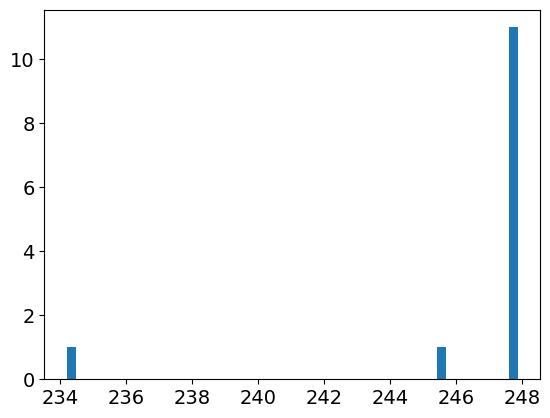

In [4]:
plt.hist([i[8] for i in elements], bins = 50)

In [5]:
start_date = '2024-02-01T00:00:00'
no_of_days = 3000

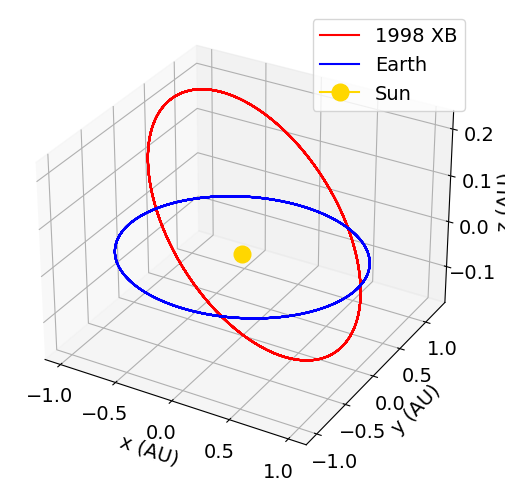

In [6]:
dates, suns, earths, minors, diffs = functions.find_xyz(start_date, no_of_days)

Minimum Earth-Asteroid distance: 0.18148437142372142 AU, on date 2029-11-29 00:00:00


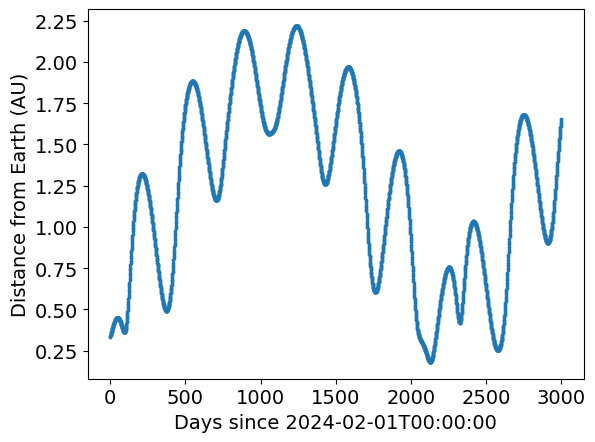

In [7]:
separation = diffs - earths
earth_distances = [np.sqrt(np.sum(np.array(element)**2)) for element in separation]
plt.scatter(np.arange(0, no_of_days), earth_distances, s = 3)
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Distance from Earth (AU)')
plt.savefig(f'plots/{object}_distance_from_Earth', bbox_inches='tight')
print(f'Minimum Earth-Asteroid distance: {np.min(earth_distances)} AU, on date {dates[np.argmin(earth_distances)]}')
close_approach_date = dates[np.argmin(earth_distances)]

Error on 1 position in the future

minor 0.06946785211945326 0.2660040844131286 0.1961543376183631
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.580404259631202 1.006548392924174 0.1961170772200845
 
minor 0.1007436496355246 0.2935342784828872 0.19044435960747239
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5491284621151307 1.0340785869939328 0.1904070992091938
 
minor 0.13307194375950362 0.31924441017223404 0.18438874271193456
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5168001679911517 1.0597887186832797 0.18435148231365597
 
minor 0.04162781088887441 0.23914071878700882 0.2010173100562561
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.6082443008617808 0.9796850272980544 0.2009800496579775
 
minor 0.06745874762831391 0.2641716404617787 0.19648727647978925
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5824133641223413 1.0047159489728243 0.19645001608

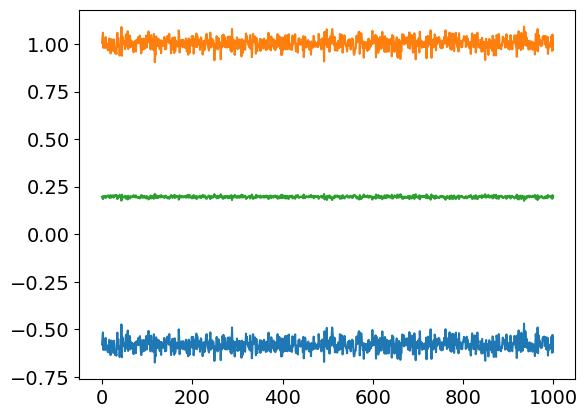

In [8]:
position = []
no_of_runs = 1000

for i in range(0, no_of_runs):
    elements = []
    #print(len(best_fit_elements))
    for j in range(0, len(best_fit_elements)):
        mu, sigma = float(best_fit_elements[j]), float(errors[j]) # mean and standard deviation
        s = np.random.normal(mu, sigma)
        elements.append(s)
    functions.write_orbital_parameters(object, fo_epoch, elements[8], elements[0], elements[1], elements[2], elements[3], elements[4])
    date, sun, earth, minor, diff = functions.find_xyz(start_date, 1, plot = False)
    position.append(diff[0])
plt.plot(position)
        

0.031616107994410385 0.029347475009502594 0.005651138704915392


"fig = plt.figure()\nax = plt.axes(projection='3d')\nax.plot3D([i[0] for i in position], [i[1] for i in position], [i[2] for i in position])"

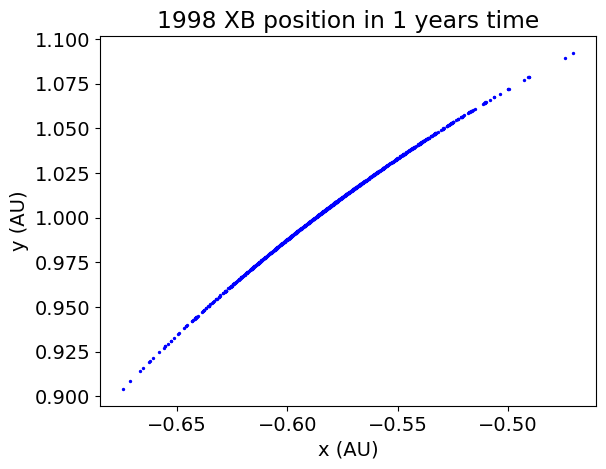

In [9]:
fig = plt.figure()
plt.scatter([i[0] for i in position], [i[1] for i in position], s = 2, color = 'blue')
print(np.std([i[0] for i in position]), np.std([i[1] for i in position]), np.std([i[2] for i in position]))
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.title(f'{object} position in 1 years time')

"""fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D([i[0] for i in position], [i[1] for i in position], [i[2] for i in position])"""

For more than one time

2024-02-01 00:00:00
minor 0.09284166002365897 0.2868520183628366 0.19190965679936417
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5570304517269963 1.0273963268738822 0.19187239640108558
 
minor 0.07122174295532042 0.26768510651577193 0.19583153440725248
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5786503687953348 1.0082294150268174 0.1957942740089739
 
minor 0.07008783193396656 0.266588756707815 0.1960339911898531
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5797842798166888 1.0071330652188606 0.1959967307915745
 
minor 0.0675825680277223 0.26424728269908326 0.19650778393596396
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.582289543722933 1.0047915912101288 0.19647052353768538
 
minor 0.08570539254604174 0.28072067532331824 0.19321333392038884
 
Sun   0.6498721117506553 -0.7405443085110456 3.726039827859441e-05
 
DIFF  -0.5641667192046136 1.0212649

Text(0, 0.5, 'Distance from Earth (AU)')

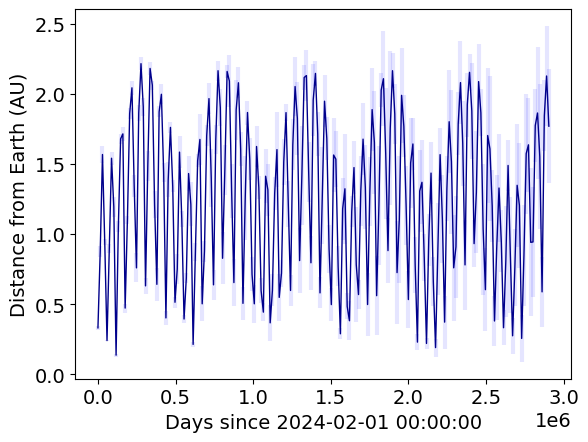

In [10]:
no_of_runs = 10
no_of_points = 200
separation_between_points = 365*40 #days

start_date = '2024-02-01T00:00:00'
year = start_date[0:4]
month = start_date[5:7]
day = start_date[8:10]
time = start_date[11:]
start_date = datetime.datetime(int(year),int(month), int(day), int(time[0:2]), int(time[3:5])*60 + int(time[6:]))

distances = []
distance_errs = []
days = []

for k in range(0, no_of_points):
    position = []
    date = start_date + datetime.timedelta(days=separation_between_points*k)
    print(date)
    for _ in range(no_of_runs):
        elements = []
        for j in range(0, len(best_fit_elements)):
            mu, sigma = float(best_fit_elements[j]), float(errors[j]) # mean and standard deviation
            s = np.random.normal(mu, sigma, 1)[0]
            elements.append(s)
        functions.write_orbital_parameters(object, fo_epoch, elements[8], elements[0], elements[1], elements[2], elements[3], elements[4])
        date_findxyz, sun, earth, minor, diff = functions.find_xyz(date, 1, plot = False)
        position.append(diff[0]-earth[0]) # position relative to Earth
    xerr = np.std([i[0] for i in position])
    yerr = np.std([i[1] for i in position])
    zerr = np.std([i[2] for i in position])
    print(xerr, yerr, zerr)
    xmean = np.mean([i[0] for i in position])
    ymean = np.mean([i[1] for i in position])
    zmean = np.mean([i[2] for i in position])
    distances.append(np.sqrt(xmean**2 + ymean**2 + zmean**2))
    distance_errs.append(0.5*distances[-1]**(-0.5)*np.sqrt((2*xmean*xerr)**2+(2*ymean*yerr)**2+(2*zmean*zerr)**2))
    days.append(separation_between_points*k)

#plt.plot(position)
plt.errorbar(days, distances, yerr = distance_errs, color='darkblue', ecolor=colors.to_rgba('blue', 0.1), elinewidth=3, lw=1)
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Distance from Earth (AU)')

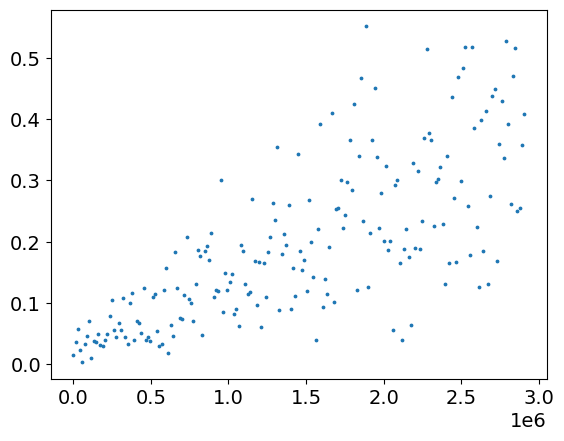

In [11]:
plt.scatter(days, distance_errs, s=3)

Calculating probability of impact with Earth

In [31]:
no_of_virtual_asteroids = 1000
no_of_runs = 10
closest_distances = []
dates = []

for _ in range(0, no_of_virtual_asteroids):
    elements = []
    for j in range(0, len(best_fit_elements)):
        mu, sigma = float(best_fit_elements[j]), float(errors[j]) # mean and standard deviation
        s = np.random.normal(mu, sigma)
        elements.append(s)
    functions.write_orbital_parameters(object, fo_epoch, elements[8], elements[0], elements[1], elements[2], elements[3], elements[4])
    date, sun, earth, minor, diff = functions.find_xyz(close_approach_date+datetime.timedelta(days=-3), 24*7, separation=1/24, plot = False)
    distances = [np.sqrt(np.sum(np.array(element)**2)) for element in diff-earth]
    closest_distances.append(min(distances))
    print(np.argmin(distances))
    dates.append(close_approach_date+datetime.timedelta(days=(-3+np.argmin(distances)/24)))
    


167
25
24
124
26
95
98
167
144
75
167
143
47
51
167
97
26
52
28
52
0
2
52
147
72
51
2
122
144
167
73
0
167
167
0
0
0
167
51
0
72
24
28
0
76
167
167
0
52
27
123
0
73
0
0
167
167
0
73
96
167
4
0
167
0
72
71
26
0
167
0
51
167
23
167
26
167
167
0
120
167
167
0
75
98
0
76
0
0
0
0
167
167
51
167
167
97
0
48
26
167
52
3
26
76
124
0
167
74
0
0
167
47
0
0
73
167
167
0
167
0
0
0
146
76
0
167
167
2
0
0
26
0
0
71
0
167
120
0
124
0
99
147
167
0
0
0
0
0
26
0
0
0
167
25
167
167
143
147
167
167
0
3
0
0
25
0
121
2
0
49
167
98
0
0
121
124
23
146
0
0
0
0
72
121
4
28
167
52
4
0
75
99
145
0
0
167
0
0
0
76
167
4
24
167
167
167
167
167
1
167
167
27
98
123
0
167
167
52
167
0
167
0
0
0
167
0
26
167
0
24
122
0
167
4
99
0
99
167
73
73
25
121
123
28
49
50
167
23
0
146
167
28
0
167
122
51
147
0
144
0
0
51
144
167
0
121
0
2
0
167
1
147
0
167
100
0
0
0
99
0
0
167
2
120
96
167
0
0
0
0
0
48
167
49
0
0
97
167
0
76
24
0
167
52
95
167
167
0
95
148
167
0
167
0
0
50
0
51
167
0
0
0
0
0
49
47
0
73
0
28
3
3
167
49
0
167
167
4

[datetime.datetime(2029, 12, 2, 23, 0), datetime.datetime(2029, 11, 27, 1, 0), datetime.datetime(2029, 11, 27, 0, 0), datetime.datetime(2029, 12, 1, 4, 0), datetime.datetime(2029, 11, 27, 2, 0), datetime.datetime(2029, 11, 29, 23, 0), datetime.datetime(2029, 11, 30, 2, 0), datetime.datetime(2029, 12, 2, 23, 0), datetime.datetime(2029, 12, 2, 0, 0), datetime.datetime(2029, 11, 29, 3, 0), datetime.datetime(2029, 12, 2, 23, 0), datetime.datetime(2029, 12, 1, 23, 0), datetime.datetime(2029, 11, 27, 23, 0), datetime.datetime(2029, 11, 28, 3, 0), datetime.datetime(2029, 12, 2, 23, 0), datetime.datetime(2029, 11, 30, 1, 0), datetime.datetime(2029, 11, 27, 2, 0), datetime.datetime(2029, 11, 28, 4, 0), datetime.datetime(2029, 11, 27, 4, 0), datetime.datetime(2029, 11, 28, 4, 0), datetime.datetime(2029, 11, 26, 0, 0), datetime.datetime(2029, 11, 26, 2, 0), datetime.datetime(2029, 11, 28, 4, 0), datetime.datetime(2029, 12, 2, 3, 0), datetime.datetime(2029, 11, 29, 0, 0), datetime.datetime(2029, 1

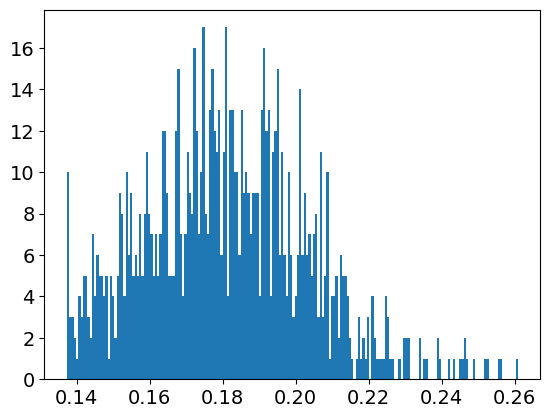

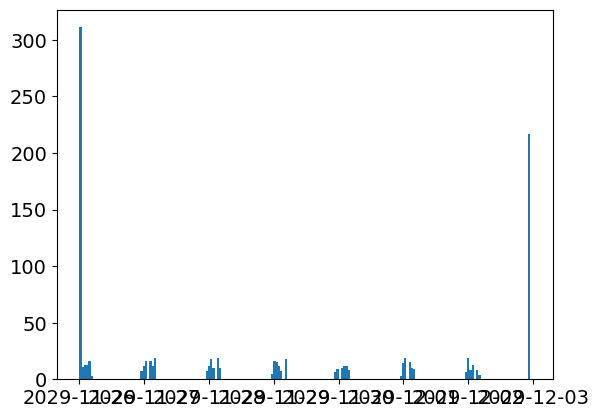

In [33]:
plt.figure(1)
plt.hist(closest_distances, bins=200)
plt.figure(2)
plt.hist(dates, bins=200)

print(dates)